<a href="https://colab.research.google.com/github/Pawan20031/Women-Safety-System/blob/main/Anomaly_Detection_(Isolation_Forest).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
from sklearn.ensemble import IsolationForest
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

In [ ]:
# Load your dataset (replace 'data.csv' with your file path)
data = pd.read_csv('data.csv')

In [ ]:
# Select features (latitude and longitude)
X = data[['Latitude', 'Longitude']]
anomaly_labels = data['anomaly']

In [ ]:
# Initialize and train an IsolationForest model for anomaly detection
contamination = 0.05  # Adjust contamination rate as needed
model = IsolationForest(contamination=contamination, random_state=42)
model.fit(X)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


IsolationForest(contamination=0.05, random_state=42)

In [ ]:
# Predict anomalies on the dataset
y_pred = model.predict(X)
anomaly_scores = model.decision_function(X)

In [ ]:
# Convert predictions (-1 for anomalies, 1 for normal) to binary labels (0 for normal, 1 for anomaly)
y_pred_binary = [1 if x == -1 else 0 for x in y_pred]

In [ ]:
# Separate anomalies from normal points
anomaly_points = X[anomaly_labels == 1]
normal_points = X[anomaly_labels == 0]

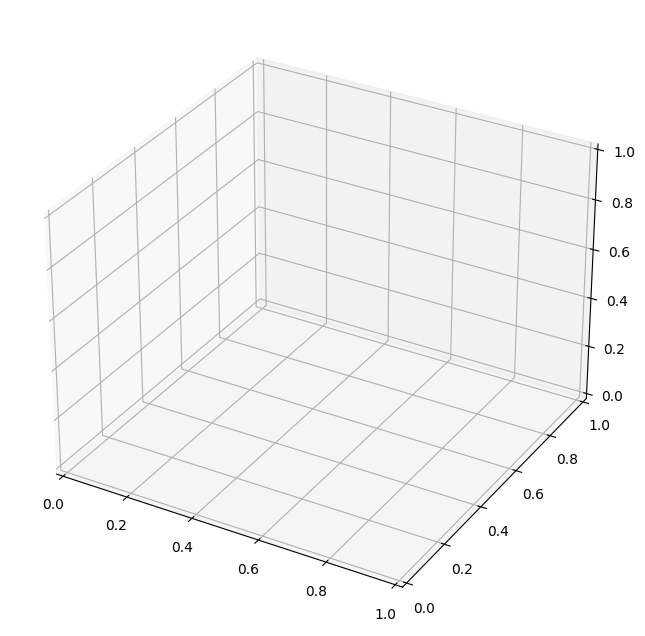

In [ ]:
# Plot anomalies using 3D scatter plot
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

In [ ]:
normal_points = X[y_pred == 1]  # Use y_pred instead of y_pred_binary
ax.scatter(normal_points['Longitude'], normal_points['Latitude'], anomaly_scores[y_pred == 1], c='blue', label='Normal')

In [ ]:
# Plot anomalies
anomaly_points = X[y_pred == -1]  # Use y_pred instead of y_pred_binary
ax.scatter(anomaly_points['Longitude'], anomaly_points['Latitude'], anomaly_scores[y_pred == -1], c='red', label='Anomaly')

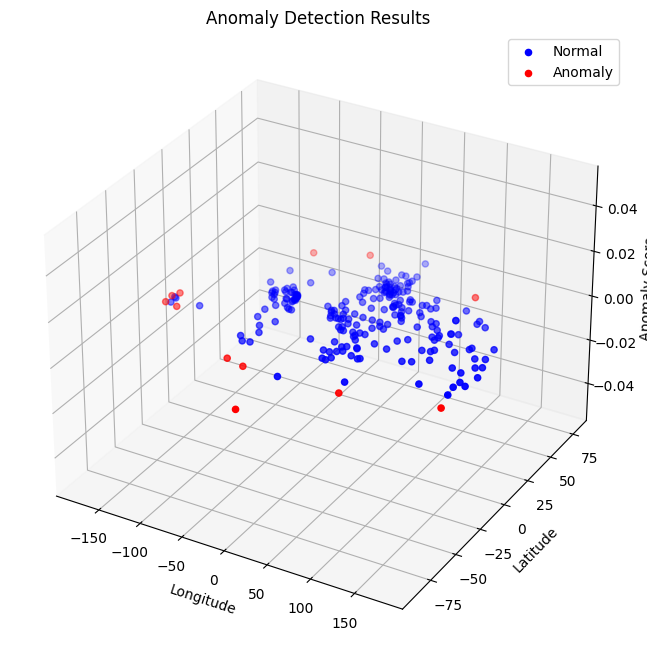

In [ ]:
# Plot anomalies using 3D scatter plot
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Plot normal points in blue
ax.scatter(normal_points['Longitude'], normal_points['Latitude'], c='blue', label='Normal')

# Plot anomalies in red
ax.scatter(anomaly_points['Longitude'], anomaly_points['Latitude'], c='red', label='Anomaly')

ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')
ax.set_zlabel('Anomaly Score')
ax.set_title('Anomaly Detection Results')
ax.legend()
plt.show()